<a href="https://colab.research.google.com/github/Jmontoyaor/Computational-electromagnetics/blob/main/BookExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ALGORITMO 6.1 simulador_fdtd_1d

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

n_frames = 400
ke = 201
ks = ke // 2
t0 = 40
spread = 12

ex = np.zeros(ke)
hy = np.zeros(ke)

# --- Variables para guardar el valor anterior en las fronteras (para ABC) ---
ex_left_past = 0.0
ex_right_past = 0.0

fig, ax = plt.subplots()
ax.set_ylim(-1.2, 1.2)
ax.set_xlim(0, ke - 1)
ax.set_xlabel("Posición espacial (k)")
ax.set_ylabel("Amplitud")
ax.set_title("Propagación de onda (con Fronteras Absorbentes)")
ax.grid(True)

line_ex, = ax.plot([], [], 'b-', label='Campo Eléctrico Ex')
line_hy, = ax.plot([], [], 'r-', label='Campo Magnético Hy')
ax.legend()
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line_ex.set_data([], [])
    line_hy.set_data([], [])
    time_text.set_text('')
    return line_ex, line_hy, time_text

def update(t):
    global ex_left_past, ex_right_past # Necesario para modificar las variables globales

    # --- Actualizaciones normales de FDTD en el interior del grid ---
    hy[0:ke-1] = hy[0:ke-1] + 0.5 * (ex[1:ke] - ex[0:ke-1])
    ex[1:ke-1] = ex[1:ke-1] + 0.5 * (hy[1:ke-1] - hy[0:ke-2])

    # --- Inyección de la fuente ---
    pulse = np.exp(-0.5 * ((t - t0) / spread)**2)
    ex[ks] += pulse

    # --- APLICACIÓN DE LAS FRONTERAS ABSORBENTES (ABC) ---
    # Se aplican después de las actualizaciones principales

    # Frontera izquierda (k=0)
    ex[0] = ex_left_past
    ex_left_past = ex[1]

    # Frontera derecha (k=ke-1)
    ex[ke-1] = ex_right_past
    ex_right_past = ex[ke-2]

    # --- Actualización de la gráfica ---
    x_data = np.arange(ke)
    line_ex.set_data(x_data, ex)
    line_hy.set_data(x_data, hy)
    time_text.set_text(f'Tiempo t = {t}')

    return line_ex, line_hy, time_text

ani = FuncAnimation(fig, update, frames=range(n_frames),
                    init_func=init, blit=True, interval=25)

video = ani.to_html5_video()
plt.close()
HTML(video)

## CELDA YEE

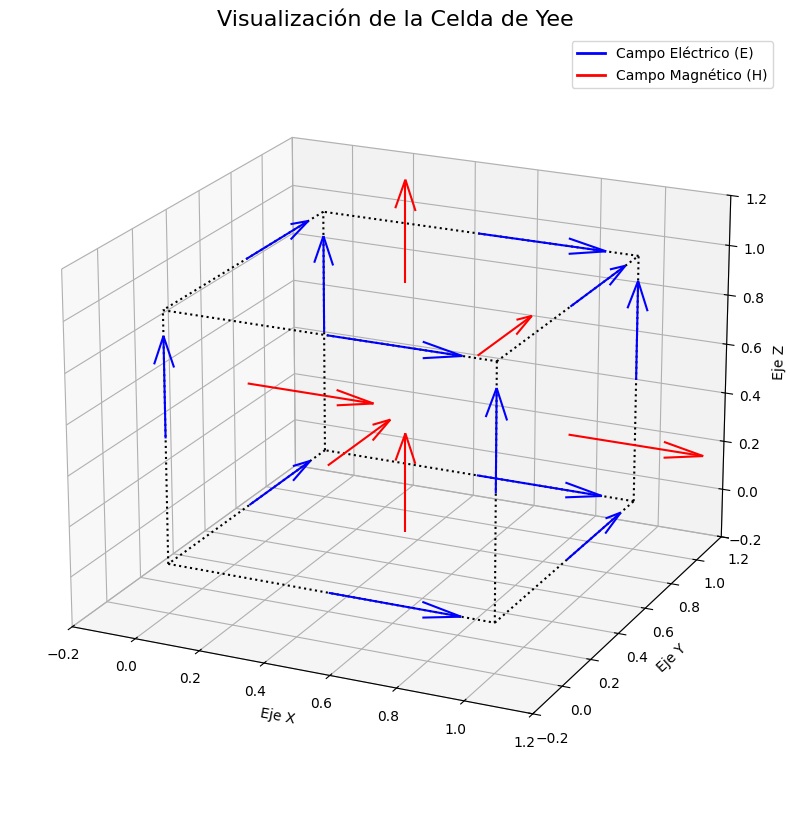

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Configuración de la figura 3D ---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# --- 2. Dibujar el cubo unitario ---
# Vértices del cubo
puntos = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                   [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

# Aristas del cubo
aristas = [[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6],
           [6, 7], [7, 4], [0, 4], [1, 5], [2, 6], [3, 7]]

for arista in aristas:
    ax.plot3D(puntos[arista, 0], puntos[arista, 1], puntos[arista, 2], 'k:')

# --- 3. Posicionar los componentes del Campo Eléctrico (E) en las aristas ---
longitud_vector = 0.4
# Componentes Ex (centros de aristas paralelas al eje X)
pos_ex = [[0.5, 0, 0], [0.5, 1, 0], [0.5, 0, 1], [0.5, 1, 1]]
for p in pos_ex:
    ax.quiver(p[0], p[1], p[2], longitud_vector, 0, 0, color='b', label='Campo E')

# Componentes Ey (centros de aristas paralelas al eje Y)
pos_ey = [[0, 0.5, 0], [1, 0.5, 0], [0, 0.5, 1], [1, 0.5, 1]]
for p in pos_ey:
    ax.quiver(p[0], p[1], p[2], 0, longitud_vector, 0, color='b')

# Componentes Ez (centros de aristas paralelas al eje Z)
pos_ez = [[0, 0, 0.5], [1, 0, 0.5], [0, 1, 0.5], [1, 1, 0.5]]
for p in pos_ez:
    ax.quiver(p[0], p[1], p[2], 0, 0, longitud_vector, color='b')

# --- 4. Posicionar los componentes del Campo Magnético (H) en las caras ---
# Componentes Hx (centros de caras perpendiculares al eje X)
pos_hx = [[0, 0.5, 0.5], [1, 0.5, 0.5]]
for p in pos_hx:
    ax.quiver(p[0], p[1], p[2], longitud_vector, 0, 0, color='r', label='Campo H')

# Componentes Hy (centros de caras perpendiculares al eje Y)
pos_hy = [[0.5, 0, 0.5], [0.5, 1, 0.5]]
for p in pos_hy:
    ax.quiver(p[0], p[1], p[2], 0, longitud_vector, 0, color='r')

# Componentes Hz (centros de caras perpendiculares al eje Z)
pos_hz = [[0.5, 0.5, 0], [0.5, 0.5, 1]]
for p in pos_hz:
    ax.quiver(p[0], p[1], p[2], 0, 0, longitud_vector, color='r')

# --- 5. Configuración final de la gráfica ---
ax.set_title('Visualización de la Celda de Yee', fontsize=16)
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_xlim([-0.2, 1.2])
ax.set_ylim([-0.2, 1.2])
ax.set_zlim([-0.2, 1.2])

# Crear una leyenda personalizada
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', lw=2, label='Campo Eléctrico (E)'),
                   Line2D([0], [0], color='r', lw=2, label='Campo Magnético (H)')]
ax.legend(handles=legend_elements)

# Ajustar la vista
ax.view_init(elev=20, azim=-65)
plt.show()

#métodos integrales muy importantes en el electromagnetismo:

##1. Modelo integral de las ecuaciones de Maxwell

In [19]:
# =====================================================
# Cálculo del campo eléctrico y potencial de una línea cargada
# (Versión para Google Colab)
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# --- Parámetros físicos ---
epsilon0 = 8.854187817e-12  # permitividad del vacío (F/m)
L = 1.0        # longitud de la línea cargada (m)
lambda_lin = 1e-6  # densidad lineal de carga (C/m)
N = 200        # número de segmentos para aproximar la integral

# --- Discretización de la línea ---
x_seg = np.linspace(-L/2 + L/(2*N), L/2 - L/(2*N), N)  # centros de los segmentos
dx = L / N
dq = lambda_lin * dx  # carga por segmento

# --- Puntos de evaluación sobre eje y ---
y_points = np.linspace(0.01, 2.0, 200)  # evitar y=0 (singularidad)

# --- Inicialización ---
Ey_num = np.zeros_like(y_points)
Ex_num = np.zeros_like(y_points)
phi_num = np.zeros_like(y_points)

# --- Cálculo del campo y potencial (suma discreta) ---
for i, y in enumerate(y_points):
    rx = -x_seg               # componente x desde el segmento al punto (0,y)
    ry = y - 0.0              # componente y
    r = np.sqrt(rx**2 + ry**2)

    coeff = 1.0 / (4 * math.pi * epsilon0)
    dEx = coeff * dq * rx / (r**3)
    dEy = coeff * dq * ry / (r**3)
    dphi = coeff * dq / r

    Ex_num[i] = np.sum(dEx)
    Ey_num[i] = np.sum(dEy)
    phi_num[i] = np.sum(dphi)

# --- Resultados en DataFrame ---
df = pd.DataFrame({
    "y (m)": y_points,
    "Ex (N/C)": Ex_num,
    "Ey (N/C)": Ey_num,
    "phi (V)": phi_num
})

# Mostrar primeras filas de la tabla
df.head(10)


,y (m),Ex (N/C),Ey (N/C),phi (V)
0,0.01,6.984919e-10,1.797094e+06,82780.239267
1,0.02,4.074536e-10,8.980371e+05,70326.279161
2,0.03,2.037268e-10,5.980945e+05,63046.971689
3,0.04,5.820766e-11,4.479465e+05,57888.391918
4,0.05,2.910383e-11,3.577180e+05,53893.441861
5,0.06,0.000000e+00,2.974511e+05,50635.786048
6,0.07,0.000000e+00,2.543071e+05,47887.984939
7,0.08,-1.455192e-11,2.218669e+05,45514.257815
8,0.09,0.000000e+00,1.965645e+05,43427.003618
9,0.10,-1.455192e-11,1.762605e+05,41566.389314


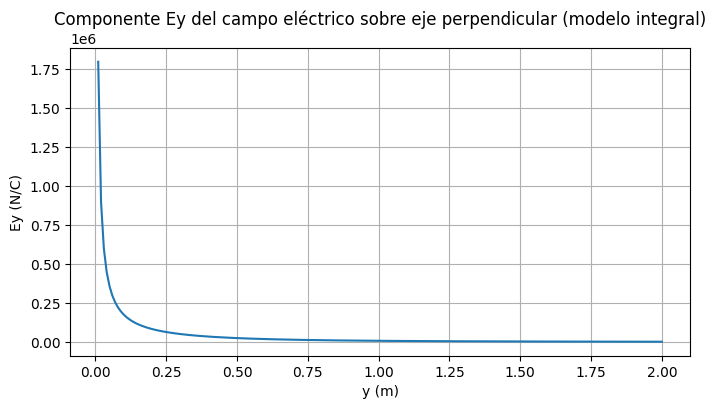

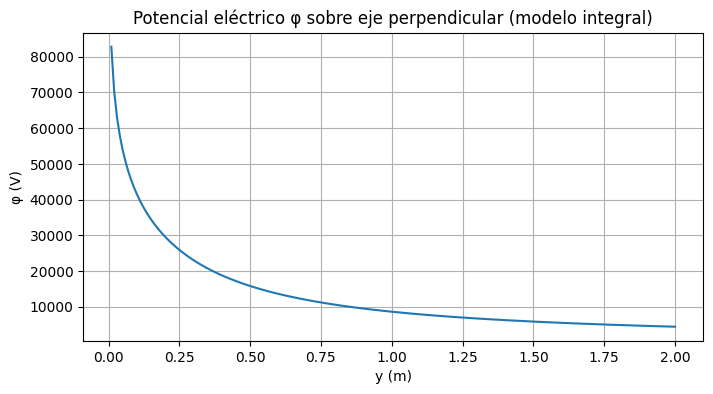

In [20]:
# --- Gráfica del campo eléctrico Ey(y) ---
plt.figure(figsize=(8,4))
plt.plot(y_points, Ey_num, linewidth=1.5)
plt.grid(True)
plt.xlabel("y (m)")
plt.ylabel("Ey (N/C)")
plt.title("Componente Ey del campo eléctrico sobre eje perpendicular (modelo integral)")
plt.show()

# --- Gráfica del potencial φ(y) ---
plt.figure(figsize=(8,4))
plt.plot(y_points, phi_num, linewidth=1.5)
plt.grid(True)
plt.xlabel("y (m)")
plt.ylabel("φ (V)")
plt.title("Potencial eléctrico φ sobre eje perpendicular (modelo integral)")
plt.show()


#2. Aproximación por dipolo discreto (DDA – Discrete Dipole Approximation)

###  Descripción del código DDA (Discrete Dipole Approximation)

El código implementa una versión simplificada del método **DDA** (*Discrete Dipole Approximation*),
utilizado para modelar la interacción de una onda electromagnética con un objeto discretizado en dipolos eléctricos.

---

**1. Discretización del objeto**

Se construye una malla tridimensional de pequeños dipolos dentro de un cubo de lado:

$$
L = 1~\mu\text{m}
$$

Cada dipolo representa un pequeño volumen del material con una permitividad relativa \( \varepsilon_r \).

---

**2. Campo incidente**

Cada dipolo recibe un campo incidente en la forma:

$$
E_{\text{inc}} = E_0 e^{j k z}
$$

donde \( E_0 \) es la amplitud del campo eléctrico, \( k = \frac{2\pi}{\lambda_0} \) es el número de onda,
y \( \lambda_0 \) es la longitud de onda en el vacío.

---

**3. Polarización del dipolo**

Cada dipolo adquiere un momento dipolar inducido proporcional al campo local:

$$
\mathbf{p} = \alpha \, \mathbf{E}_{\text{local}}
$$

con polarizabilidad:

$$
\alpha = 3 \varepsilon_0 \frac{\varepsilon_r - 1}{\varepsilon_r + 2}
$$

---

**4. Interacción entre dipolos**

Se suma la contribución del campo de los demás dipolos:

$$
\mathbf{E}_{\text{local}} =
\sum_{i \neq j} \frac{1}{4\pi\varepsilon_0}
\frac{\alpha \, \mathbf{E}_{\text{inc},i}}{R_{ij}^3}
$$

donde \( R_{ij} \) es la distancia entre los dipolos \( i \) y \( j \).

---

**5. Campo total**

El campo total en cada dipolo es:

$$
\mathbf{E}_{\text{total}} =
\mathbf{E}_{\text{inc}} +
\mathbf{E}_{\text{local}}
$$

---

**6. Visualización**

Finalmente, se grafica la variación de la parte real del campo total a lo largo del eje \( z \),
mostrando cómo se modula el campo dentro del material por las interferencias entre los dipolos.


Número total de dipolos: 1000


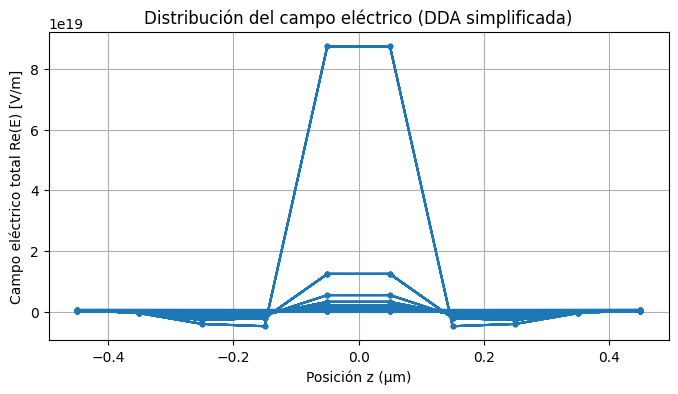

In [21]:
# ==========================================================
# Discrete Dipole Approximation (DDA) - Ejemplo básico
# ==========================================================
# Simulación: cubo de material dieléctrico iluminado por una onda electromagnética
# Cada dipolo responde a un campo incidente con polarización proporcional al campo local.

import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros físicos ---
E0 = 1.0                # Amplitud del campo incidente (V/m)
lambda0 = 0.5e-6        # Longitud de onda (m)
k = 2 * np.pi / lambda0  # Número de onda (1/m)
eps0 = 8.854e-12         # Permisividad del vacío
eps_r = 2.25             # Permisividad relativa del material (n^2)
alpha = 3 * eps0 * (eps_r - 1) / (eps_r + 2)  # Polarizabilidad aproximada (esfera pequeña)

# --- Geometría del cubo discretizado ---
N = 10             # Número de dipolos por lado
L = 1e-6           # Lado del cubo (1 µm)
d = L / N          # Espaciamiento entre dipolos
coords = np.linspace(-L/2 + d/2, L/2 - d/2, N)
x, y, z = np.meshgrid(coords, coords, coords, indexing='ij')
positions = np.column_stack((x.ravel(), y.ravel(), z.ravel()))
num_dipoles = positions.shape[0]

print(f"Número total de dipolos: {num_dipoles}")

# --- Campo incidente (onda plana en dirección z) ---
E_inc = E0 * np.exp(1j * k * positions[:, 2])  # E = E0 e^(jkz)

# --- Campo total inicial (solo incidente) ---
E_total = E_inc.copy()

# --- Interacciones dipolo-dipolo (simplificación: ignoramos acoplamientos múltiples) ---
# Campo en el centro del cubo se estima como la suma ponderada de los campos de los demás dipolos.

E_local = np.zeros_like(E_total, dtype=complex)
r_center = np.array([0, 0, 0])

for i, r in enumerate(positions):
    R = np.linalg.norm(r - r_center)
    if R == 0:
        continue
    # Campo de un dipolo (forma simplificada del tensor de Green)
    E_local[i] = (1 / (4 * np.pi * eps0)) * (alpha * E_inc[i]) / (R**3)

# Campo total (onda + contribución mutua simplificada)
E_total += np.real(E_local)

# --- Visualización del campo total sobre el eje z ---
plt.figure(figsize=(8,4))
plt.plot(positions[:,2]*1e6, np.real(E_total), '.-')
plt.xlabel("Posición z (µm)")
plt.ylabel("Campo eléctrico total Re(E) [V/m]")
plt.title("Distribución del campo eléctrico (DDA simplificada)")
plt.grid(True)
plt.show()


# 3. Método de Momentos (MoM – Method of Moments)

### Método de Momentos (MoM – Method of Moments)

El Método de Momentos transforma una ecuación integral electromagnética en un sistema algebraico que puede resolverse numéricamente.

---

**1. Ecuación integral general**

Se parte de una ecuación integral del tipo:

$$
L[u(r)] = f(r)
$$

donde \( L \) es un operador lineal, \( u(r) \) la incógnita (por ejemplo, corriente o potencial),
y \( f(r) \) una fuente conocida.

---

**2. Expansión en funciones base**

La incógnita se aproxima mediante una combinación lineal de funciones base \( h_n(r) \):

$$
u(r) \approx \sum_{n=1}^N \alpha_n h_n(r)
$$

donde \( \alpha_n \) son los coeficientes por determinar.

---

**3. Proyección con funciones de peso**

Para reducir el error, se multiplica por funciones de peso \( w_m(r) \) y se integra en el dominio:

$$
\int w_m(r) \, L[u(r)] \, dr = \int w_m(r) \, f(r) \, dr
$$

Sustituyendo la expansión de \( u(r) \):

$$
\sum_{n=1}^N \alpha_n
\int w_m(r) \, L[h_n(r)] \, dr =
\int w_m(r) \, f(r) \, dr
$$

---

**4. Forma matricial**

La ecuación anterior se expresa como:

$$
[Z][\alpha] = [V]
$$

con

$$
Z_{mn} = \langle w_m(r), L[h_n(r)] \rangle, \quad
V_m = \langle w_m(r), f(r) \rangle
$$

---

**5. Solución numérica**

Resolviendo el sistema:

$$
[\alpha] = [Z]^{-1} [V]
$$

se obtienen los coeficientes \( \alpha_n \), que describen la corriente, potencial o densidad de carga buscada.

---

**6. Aplicación práctica**

En el ejemplo mostrado, la ecuación integral de potencial de una varilla conductora se discretiza para formar el sistema:

$$
\sum_{n=1}^{N} \frac{q_n}{|x_m - x_n|} = 4\pi \varepsilon_0 V_m
$$

cuyo resultado es la distribución de carga \( q_n \) a lo largo del conductor.


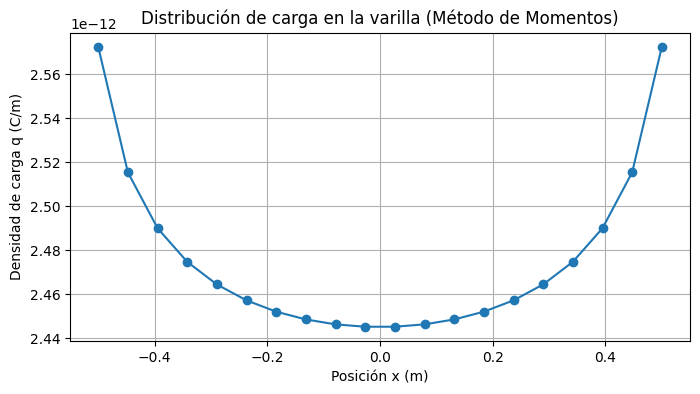

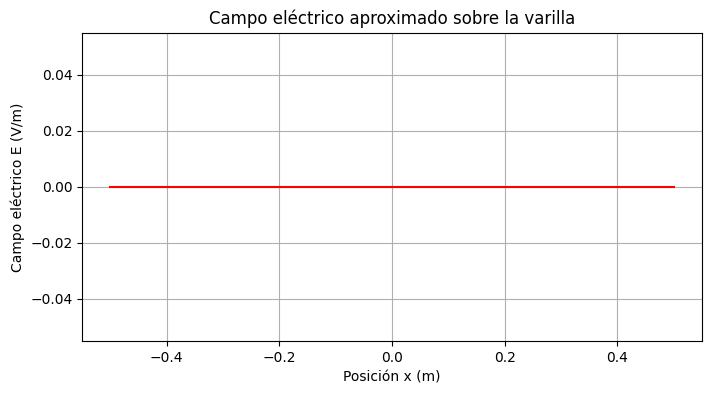

In [22]:
# ==========================================================
# Método de Momentos (MoM) - Ejemplo básico
# ==========================================================
# Problema: determinar la distribución de carga en una varilla conductora
# bajo un potencial conocido (modelo 1D simplificado)

import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros físicos ---
eps0 = 8.854e-12       # permitividad del vacío
L = 1.0                 # longitud de la varilla [m]
N = 20                  # número de segmentos
V0 = 1.0                # potencial aplicado [V]

# --- Discretización de la varilla ---
x = np.linspace(-L/2, L/2, N)
dx = L / N

# --- Construcción de la matriz de impedancia Z ---
Z = np.zeros((N, N))
for m in range(N):
    for n in range(N):
        if m == n:
            # término propio (auto-interacción)
            Z[m, n] = 1/(4*np.pi*eps0) * 2/dx
        else:
            R = abs(x[m] - x[n])
            Z[m, n] = 1/(4*np.pi*eps0) * dx / R

# --- Vector de voltaje aplicado (potencial conocido) ---
V = np.ones(N) * V0

# --- Resolver el sistema: Z * q = V  → q = Z⁻¹ * V
q = np.linalg.solve(Z, V)   # densidad de carga en cada segmento

# --- Gráficas ---
plt.figure(figsize=(8,4))
plt.plot(x, q, 'o-', linewidth=1.5)
plt.xlabel("Posición x (m)")
plt.ylabel("Densidad de carga q (C/m)")
plt.title("Distribución de carga en la varilla (Método de Momentos)")
plt.grid(True)
plt.show()

# --- Campo eléctrico aproximado (derivada numérica del potencial) ---
E = -np.gradient(V, dx)
plt.figure(figsize=(8,4))
plt.plot(x, E, 'r-', linewidth=1.5)
plt.xlabel("Posición x (m)")
plt.ylabel("Campo eléctrico E (V/m)")
plt.title("Campo eléctrico aproximado sobre la varilla")
plt.grid(True)
plt.show()
